# Conversion of Data into Corpus Table
# -------------------------------------------------------

## Setup

In [399]:
import pandas as pd
import configparser
config = configparser.ConfigParser()
config.read("../../../env.ini")

[]

In [455]:
text_file = "eta_corpus.txt"
csv_file  = "tokens.csv"
vocab_file = "vocab.csv"

In [401]:
OHCO = ['artist', 'song','lines', 'token_num']

In [402]:
LINES = pd.DataFrame(open(text_file, 'r', encoding='utf-8-sig').readlines(), columns=['line_str'])
LINES.index.name = 'line_num'
LINES.line_str = LINES.line_str.str.replace(r'\n+', ' ', regex=True).str.strip()

In [403]:
LINES = LINES[~LINES["line_str"].str.contains("verse", case=False, na=False)]

In [404]:
LINES = LINES[~LINES["line_str"].str.contains("chorus", case=False, na=False)]
LINES = LINES[~LINES["line_str"].str.contains("bridge", case=False, na=False)]
LINES = LINES[~LINES["line_str"].str.contains("refrain", case=False, na=False)]

In [405]:
LINES.sample(20)

,line_str
line_num,
12010,'Cause what if I never love again?\
5681,'Cause none of us are right\
17874,When you're feeling full of doubt\
21726,"Marching, marching, marching\"
10012,All the single ladies (All the single ladies)\
18952,\
14458,\
19024,"You can get the money, you can get the power\"
35062,"And your priority, it must be her\"


In [406]:
LINES.head(20)

,line_str
line_num,
0,\
1,\
2,\
3,\
4,\
5,\
6,\
7,\
8,\


In [407]:
LINES["line_str"] = LINES["line_str"].str.replace(r"\\", "", regex=True)

In [408]:

LINES.head(50)

,line_str
line_num,
0,
1,
2,
3,
4,
5,
6,
7,
8,


In [409]:
artist_pat = r"^[A-Z\s]+$"

In [410]:
artist_lines = LINES.line_str.str.match(artist_pat, case=True)

In [411]:
LINES.loc[artist_lines]

,line_str
line_num,
10,TAYLOR SWIFT
3536,PINK
7161,BEYONCE
11614,ADELE
14657,WHITNEY HOUSTON
18075,LAURYN HILL
21857,DUA LIPA
25281,DOLLY PARTON
27569,CYNDI LAUPER


In [412]:
LINES.loc[artist_lines, 'artist'] = [i for i in LINES.loc[artist_lines]['line_str']]

In [413]:
LINES.sample(10)

,line_str,artist
line_num,,
33184,Down like six thirty (Six thirty),NaN
24898,'Good Times (Jamie xx Rework)',NaN
25188,"You pulled this stunt a million times, but nev...",NaN
28924,When all I had was a hat full of stars,NaN
1203,"Stop, you're losin' me",NaN
4665,,NaN
16963,Would you (Would you),NaN
19774,He wants to know how far we're willing to go,NaN
20794,Mention my name it's the same [?] they like [?...,NaN


In [414]:
LINES.artist = LINES.artist.ffill()

In [415]:
LINES.sample(10)

,line_str,artist
line_num,,
33892,But you'd love a rich man six-foot-two or taller,AMY WINEHOUSE
29222,Maybe he'll know why,CYNDI LAUPER
13932,I want you to love me,ADELE
34284,'I Heard Love Is Blind',AMY WINEHOUSE
15305,,WHITNEY HOUSTON
26715,But she's an eagle when she flies,DOLLY PARTON
4257,"Let the walls crack, 'cause it lets the light in",PINK
15022,How will I know? (How will I know?),WHITNEY HOUSTON
23652,,DUA LIPA


In [416]:
#drop all the blank lines before first artist - Taylor Swift
LINES = LINES.dropna(subset=['artist'])

In [417]:
#since their work is done now
LINES = LINES.loc[~artist_lines]

# -------------------------------------------------------

## Group into Artist's Body of Work

In [418]:
OHCO[:1]

['artist']

In [419]:
ARTIST = LINES.groupby(OHCO[:1])\
    .line_str.apply(lambda x: '\n'.join(x))\
    .to_frame('artist_work')

In [420]:
ARTIST

,artist_work
artist,
ADELE,\n\n\n'Hello'\n\n\nTo go over everything\nThey...
AMY WINEHOUSE,\n\n\n'Back to Black'\n\n\nMe and my head high...
ARIANA GRANDE,"\n\n\n'uc0u8203 thank u, next'\n\n\nWrote some..."
BEYONCE,\n\n\n'Formation'\n\n\nY'all haters corny with...
CYNDI LAUPER,"\n\n\n'Time After Time'\n\n\nFlashback, warm n..."
DOLLY PARTON,"\n\n\n'Jolene'\n\n\nJolene, Jolene, Jolene, Jo..."
DUA LIPA,\n\n\n'New Rules'\n\n\nTalkin' in my sleep at ...
LAURYN HILL,"\n\n\n'Doo Wop (That Thing)'\n\n\nYo, yo, my m..."
PINK,\n\n\n'What About Us'\n\n\nWe are searchlights...


In [463]:
ARTIST_copy = ARTIST.copy()

In [464]:
ARTIST_copy['artist_work'] = ARTIST_copy.artist_work.str.strip()

In [465]:
ARTIST_copy

,artist_work
artist,
ADELE,'Hello'\n\n\nTo go over everything\nThey say t...
AMY WINEHOUSE,'Back to Black'\n\n\nMe and my head high\nAnd ...
ARIANA GRANDE,"'uc0u8203 thank u, next'\n\n\nWrote some songs..."
BEYONCE,'Formation'\n\n\nY'all haters corny with that ...
CYNDI LAUPER,"'Time After Time'\n\n\nFlashback, warm nights ..."
DOLLY PARTON,"'Jolene'\n\n\nJolene, Jolene, Jolene, Jolene\n..."
DUA LIPA,"'New Rules'\n\n\nTalkin' in my sleep at night,..."
LAURYN HILL,"'Doo Wop (That Thing)'\n\n\nYo, yo, my men and..."
PINK,"'What About Us'\n\n\nWe are searchlights, we c..."


In [467]:
ARTIST_copy["character_count"] = ARTIST_copy["artist_work"].str.len()
ARTIST_copy

,artist_work,character_count
artist,,
ADELE,'Hello'\n\n\nTo go over everything\nThey say t...,76812
AMY WINEHOUSE,'Back to Black'\n\n\nMe and my head high\nAnd ...,52459
ARIANA GRANDE,"'uc0u8203 thank u, next'\n\n\nWrote some songs...",89008
BEYONCE,'Formation'\n\n\nY'all haters corny with that ...,146783
CYNDI LAUPER,"'Time After Time'\n\n\nFlashback, warm nights ...",54669
DOLLY PARTON,"'Jolene'\n\n\nJolene, Jolene, Jolene, Jolene\n...",59805
DUA LIPA,"'New Rules'\n\n\nTalkin' in my sleep at night,...",84067
LAURYN HILL,"'Doo Wop (That Thing)'\n\n\nYo, yo, my men and...",129809
PINK,"'What About Us'\n\n\nWe are searchlights, we c...",93059


In [468]:
length_file = "artist_work_char_len.csv"
ARTIST_copy.to_csv(length_file)

## Split Artist's Body of Work into Songs

In [423]:
song_title_pat = r"\n\n\n'([^']+)'\n\n\n"

In [424]:
SONGS = ARTIST['artist_work'].str.split(song_title_pat, expand=True).stack()\
    .to_frame('song_title_pat').sort_index()


In [425]:
SONGS

song_title_pat
artist                                                               
ADELE           0                                                    
                1                                               Hello
                2   To go over everything\nThey say that time's su...
                3                                          Easy On Me
                4   I know there is hope in these waters\nBut I ca...
...                                                               ...
WHITNEY HOUSTON 84  And as I poured my coffee\nI picked up a magaz...
                85                               You Light Up My Life
                86  So many dreams I kept deep inside me\nAlone in...
                87                                   Call You Tonight
                88  Whoa (Whoa)\nOh (Hm, yeah)\n\nThe stars must b...

[973 rows x 1 columns]

In [426]:
SONG = SONGS.dropna(subset=["song_title_pat"])

In [427]:
SONG

song_title_pat
artist                                                               
ADELE           0                                                    
                1                                               Hello
                2   To go over everything\nThey say that time's su...
                3                                          Easy On Me
                4   I know there is hope in these waters\nBut I ca...
...                                                               ...
WHITNEY HOUSTON 84  And as I poured my coffee\nI picked up a magaz...
                85                               You Light Up My Life
                86  So many dreams I kept deep inside me\nAlone in...
                87                                   Call You Tonight
                88  Whoa (Whoa)\nOh (Hm, yeah)\n\nThe stars must b...

[973 rows x 1 columns]

In [428]:
SONG = SONG[SONG["song_title_pat"].str.strip() != ""]
df = SONG.reset_index(inplace=False)
df

,artist,level_1,song_title_pat
0,ADELE,1,Hello
1,ADELE,2,To go over everything\nThey say that time's su...
2,ADELE,3,Easy On Me
3,ADELE,4,I know there is hope in these waters\nBut I ca...
4,ADELE,5,Someone Like You
...,...,...,...
957,WHITNEY HOUSTON,84,And as I poured my coffee\nI picked up a magaz...
958,WHITNEY HOUSTON,85,You Light Up My Life
959,WHITNEY HOUSTON,86,So many dreams I kept deep inside me\nAlone in...
960,WHITNEY HOUSTON,87,Call You Tonight


In [429]:
SONG

song_title_pat
artist                                                               
ADELE           1                                               Hello
                2   To go over everything\nThey say that time's su...
                3                                          Easy On Me
                4   I know there is hope in these waters\nBut I ca...
                5                                    Someone Like You
...                                                               ...
WHITNEY HOUSTON 84  And as I poured my coffee\nI picked up a magaz...
                85                               You Light Up My Life
                86  So many dreams I kept deep inside me\nAlone in...
                87                                   Call You Tonight
                88  Whoa (Whoa)\nOh (Hm, yeah)\n\nThe stars must b...

[962 rows x 1 columns]

In [430]:
song_titles = df.loc[df.index % 2 == 0, ["artist", "song_title_pat"]].reset_index(drop=True)
song_lyrics = df.loc[df.index % 2 == 1, ["song_title_pat"]].reset_index(drop=True)
paired_df = pd.DataFrame({
    "artist": song_titles["artist"],  # Artist name from the song titles section
    "song_title": song_titles["song_title_pat"],  # Song titles
    "song_lyrics": song_lyrics["song_title_pat"]  # Song lyrics
})

In [431]:
paired_df

,artist,song_title,song_lyrics
0,ADELE,Hello,To go over everything\nThey say that time's su...
1,ADELE,Easy On Me,I know there is hope in these waters\nBut I ca...
2,ADELE,Someone Like You,I heard that your dreams came true\nGuess she ...
3,ADELE,Set Fire to the Rain,"I let it fall, my heart\nAnd as it fell, you r..."
4,ADELE,Rolling in the Deep,"Finally, I can see you crystal clear\nGo ahead..."
...,...,...,...
476,WHITNEY HOUSTON,You Were Loved,Every one wants a chance to be someone\nWe all...
477,WHITNEY HOUSTON,Love Will Save the Day,You try so hard to make sure everything goes r...
478,WHITNEY HOUSTON,Where You Are,And as I poured my coffee\nI picked up a magaz...
479,WHITNEY HOUSTON,You Light Up My Life,So many dreams I kept deep inside me\nAlone in...


In [432]:
SONGS = paired_df.set_index(['artist', 'song_title'])

In [433]:
SONGS

song_lyrics
artist          song_title                                                               
ADELE           Hello                   To go over everything\nThey say that time's su...
                Easy On Me              I know there is hope in these waters\nBut I ca...
                Someone Like You        I heard that your dreams came true\nGuess she ...
                Set Fire to the Rain    I let it fall, my heart\nAnd as it fell, you r...
                Rolling in the Deep     Finally, I can see you crystal clear\nGo ahead...
...                                                                                   ...
WHITNEY HOUSTON You Were Loved          Every one wants a chance to be someone\nWe all...
                Love Will Save the Day  You try so hard to make sure everything goes r...
                Where You Are           And as I poured my coffee\nI picked up a magaz...
                You Light Up My Life    So many dreams I kept deep inside me\nAlone in...
                Call You Tonight        Whoa (Whoa)\nOh (Hm, yeah)\n\nThe stars must b...

[481 rows x 1 columns]

# -------------------------------------------------------


## Chunking by the Lines in Each Song

In [434]:
line_pat = r'\n+'
SONG_LINES = SONGS['song_lyrics'].str.split(line_pat, expand=True).stack()\
    .to_frame('song_lines')
SONG_LINES.index.names = OHCO[:3]

In [436]:
SONG_LINES

song_lines
artist          song             lines                                                   
ADELE           Hello            0                                  To go over everything
                                 1               They say that time's supposed to heal ya
                                 2                          But I ain't done much healin'
                                 3                                Hello, can you hear me?
                                 4      I'm in California dreaming about who we used t...
...                                                                                   ...
WHITNEY HOUSTON Call You Tonight 43     How there's so many things I wanna get to know...
                                 44     I wish that I could stay (Stay), but I gotta g...
                                 45     So I'ma call you tonight (Promise I will, prom...
                                 46     I will, baby, just as soon as I get time alone...
                                 47                                                      

[11155 rows x 1 columns]

In [437]:
SONG_LINES.rename(columns = {"song_lines":"lyrics"}, inplace=True)

In [438]:
SONG_LINES

lyrics
artist          song             lines                                                   
ADELE           Hello            0                                  To go over everything
                                 1               They say that time's supposed to heal ya
                                 2                          But I ain't done much healin'
                                 3                                Hello, can you hear me?
                                 4      I'm in California dreaming about who we used t...
...                                                                                   ...
WHITNEY HOUSTON Call You Tonight 43     How there's so many things I wanna get to know...
                                 44     I wish that I could stay (Stay), but I gotta g...
                                 45     So I'ma call you tonight (Promise I will, prom...
                                 46     I will, baby, just as soon as I get time alone...
                                 47                                                      

[11155 rows x 1 columns]

# -------------------------------------------------------

## Chunking Into Tokens 

In [469]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import re

In [470]:
keep_whitespace = True

In [473]:
if keep_whitespace:
    # Return a tokenized copy of text
    # using NLTK's recommended word tokenizer.
    TOKENS = SONG_LINES.lyrics\
            .apply(lambda x: pd.Series(nltk.pos_tag(nltk.word_tokenize(x))))\
            .stack()\
            .to_frame('pos_tuple')
else:
    # Tokenize a string on whitespace (space, tab, newline).
    # In general, users should use the string ``split()`` method instead.
    # Returns fewer tokens.
    TOKENS = SONG_LINES.lyrics\
            .apply(lambda x: pd.Series(nltk.pos_tag(nltk.WhitespaceTokenizer().tokenize(x))))\
            .stack()\
            .to_frame('pos_tuple')

In [474]:
TOKENS.index.names = OHCO

In [475]:
TOKENS

pos_tuple
artist          song             lines token_num                  
ADELE           Hello            0     0                  (To, TO)
                                       1                  (go, VB)
                                       2                (over, RP)
                                       3          (everything, NN)
                                 1     0               (They, PRP)
...                                                            ...
WHITNEY HOUSTON Call You Tonight 46    13                   ((, ()
                                       14                 (Oh, UH)
                                       15                   (,, ,)
                                       16               (baby, NN)
                                       17                   (), ))

[93450 rows x 1 columns]

In [477]:
TOKENS['pos'] = TOKENS.pos_tuple.apply(lambda x: x[1])
TOKENS['token_str'] = TOKENS.pos_tuple.apply(lambda x: x[0])
TOKENS['term_str'] = TOKENS.token_str.str.lower().str.replace(r"\W+", "", regex=True)
TOKENS['pos_group'] = TOKENS.pos.str[:2]
TOKENS

pos_tuple  pos  \
artist          song             lines token_num                          
ADELE           Hello            0     0                  (To, TO)   TO   
                                       1                  (go, VB)   VB   
                                       2                (over, RP)   RP   
                                       3          (everything, NN)   NN   
                                 1     0               (They, PRP)  PRP   
...                                                            ...  ...   
WHITNEY HOUSTON Call You Tonight 46    13                   ((, ()    (   
                                       14                 (Oh, UH)   UH   
                                       15                   (,, ,)    ,   
                                       16               (baby, NN)   NN   
                                       17                   (), ))    )   

                                                   token_str    term_str  \
artist          song             lines token_num                           
ADELE           Hello            0     0                  To          to   
                                       1                  go          go   
                                       2                over        over   
                                       3          everything  everything   
                                 1     0                They        they   
...                                                      ...         ...   
WHITNEY HOUSTON Call You Tonight 46    13                  (               
                                       14                 Oh          oh   
                                       15                  ,               
                                       16               baby        baby   
                                       17                  )               

                                                 pos_group  
artist          song             lines token_num            
ADELE           Hello            0     0                TO  
                                       1                VB  
                                       2                RP  
                                       3                NN  
                                 1     0                PR  
...                                                    ...  
WHITNEY HOUSTON Call You Tonight 46    13                (  
                                       14               UH  
                                       15                ,  
                                       16               NN  
                                       17                )  

[93450 rows x 5 columns]

# -------------------------------------------------------

## Extract Vocabulary

In [478]:
VOCAB = TOKENS.term_str.value_counts().to_frame('n')
VOCAB.index.name = 'term_str'
VOCAB['p'] = VOCAB.n / VOCAB.n.sum()
VOCAB['i'] = -np.log2(VOCAB.p)
VOCAB['n_chars'] = VOCAB.index.str.len()

In [479]:
VOCAB

,n,p,i,n_chars
term_str,,,,
,12014,0.128561,2.959478,0
i,4849,0.051889,4.268436,1
you,3962,0.042397,4.559894,3
the,2130,0.022793,5.455269,3
it,2056,0.022001,5.506282,2
...,...,...,...,...
duffel,1,0.000011,16.511907,6
couple,1,0.000011,16.511907,6
housekeeping,1,0.000011,16.511907,12


In [480]:
VOCAB['max_pos_group'] = TOKENS[['term_str','pos_group']].value_counts().unstack(fill_value=0).idxmax(1)
VOCAB['max_pos'] = TOKENS[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1)
VOCAB

,n,p,i,n_chars,max_pos_group,max_pos
term_str,,,,,,
,12014,0.128561,2.959478,0,",",","
i,4849,0.051889,4.268436,1,PR,PRP
you,3962,0.042397,4.559894,3,PR,PRP
the,2130,0.022793,5.455269,3,DT,DT
it,2056,0.022001,5.506282,2,PR,PRP
...,...,...,...,...,...,...
duffel,1,0.000011,16.511907,6,NN,NN
couple,1,0.000011,16.511907,6,NN,NN
housekeeping,1,0.000011,16.511907,12,NN,NNP


### Identifying Stop Words

In [483]:
sw = pd.DataFrame({'stop': 1}, index=nltk.corpus.stopwords.words('english'))
sw.index.name='term_str'

In [484]:
if 'stop' not in VOCAB.columns:
    VOCAB = VOCAB.join(sw)
    VOCAB['stop'] = VOCAB['stop'].fillna(0).astype('int')
VOCAB

,n,p,i,n_chars,max_pos_group,max_pos,stop
term_str,,,,,,,
,12014,0.128561,2.959478,0,",",",",0
i,4849,0.051889,4.268436,1,PR,PRP,1
you,3962,0.042397,4.559894,3,PR,PRP,1
the,2130,0.022793,5.455269,3,DT,DT,1
it,2056,0.022001,5.506282,2,PR,PRP,1
...,...,...,...,...,...,...,...
duffel,1,0.000011,16.511907,6,NN,NN,0
couple,1,0.000011,16.511907,6,NN,NN,0
housekeeping,1,0.000011,16.511907,12,NN,NNP,0


# -------------------------------------------------------

### Adding Stems

In [485]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
VOCAB['porter_stem'] = VOCAB.apply(lambda x: stemmer.stem(x.name), 1)
VOCAB

,n,p,i,n_chars,max_pos_group,max_pos,stop,porter_stem
term_str,,,,,,,,
,12014,0.128561,2.959478,0,",",",",0,
i,4849,0.051889,4.268436,1,PR,PRP,1,i
you,3962,0.042397,4.559894,3,PR,PRP,1,you
the,2130,0.022793,5.455269,3,DT,DT,1,the
it,2056,0.022001,5.506282,2,PR,PRP,1,it
...,...,...,...,...,...,...,...,...
duffel,1,0.000011,16.511907,6,NN,NN,0,duffel
couple,1,0.000011,16.511907,6,NN,NN,0,coupl
housekeeping,1,0.000011,16.511907,12,NN,NNP,0,housekeep


# -------------------------------------------------------

## Gathering By Content Object

In [445]:
def gather(ohco_level):
    global TOKENS
    level_name = OHCO[ohco_level-1].split('_')[0]
    df = TOKENS.groupby(OHCO[:ohco_level])\
        .token_str.apply(lambda x: x.str.cat(sep=' '))\
        .to_frame(f"{level_name}_str")
    return df

In [446]:
gather(1)

,artist_str
artist,
ADELE,To go over everything They say that time s sup...
AMY WINEHOUSE,Me and my head high And my tears dry get on wi...
ARIANA GRANDE,Wrote some songs about Ricky Now I listen and ...
BEYONCE,Partition Halo If I Were a Boy Hold Up Sorry P...
CYNDI LAUPER,Girls Just Want To Have Fun True Colors She Bo...
DOLLY PARTON,9 to 5 Coat of Many Colors I Will Always Love ...
DUA LIPA,IDGAF Levitating Blow Your Mind (Mwah) Break M...
LAURYN HILL,Ex Factor Lost Ones Tell Him Everything Is Eve...
PINK,Beautiful Trauma Try Just Like Fire So What Wh...


In [447]:
gather(2)

song_str
artist          song                                                                       
ADELE           All I Ask                 They ve all been said before you know So why d...
                Best for Last             And it s been waitin for you to open up yours ...
                Can I Get It              I will beg and I ll steal I will borrow If I c...
                Chasing Pavements         If I m wrong I am right Don t need to look no ...
                Cold Shoulder             You say it s all in my head And the things I t...
...                                                                                     ...
WHITNEY HOUSTON Who Would Imagine a King  And you could grow up to be anything But who w...
                Why Does It Hurt So Bad   Thought I was over you But I keep crying When ...
                You Give Good Love        I found out what I ve been missing Always on t...
                You Light Up My Life      So many dreams I kept deep inside me Alone in ...
                You Were Loved            Every one wants a chance to be someone We all ...

[478 rows x 1 columns]

In [448]:
gather(3)

lines_str
artist          song           lines                                                 
ADELE           All I Ask      0                They ve all been said before you know
                               1                    So why don t we just play pretend
                               2         Like we re not scared of what is coming next
                               3                    Or scared of having nothing left?
                               4                              Look don t get me wrong
...                                                                               ...
WHITNEY HOUSTON You Were Loved 53     So remember to tell that special one (Yeah mmm)
                               54                                      You were loved
                               55                                      You were loved
                               56                                      You were loved
                               57                                                    

[11040 rows x 1 columns]

# -------------------------------------------------------

## Save to CSV

In [481]:
TOKENS.to_csv(csv_file)

<Axes: ylabel='term_str'>

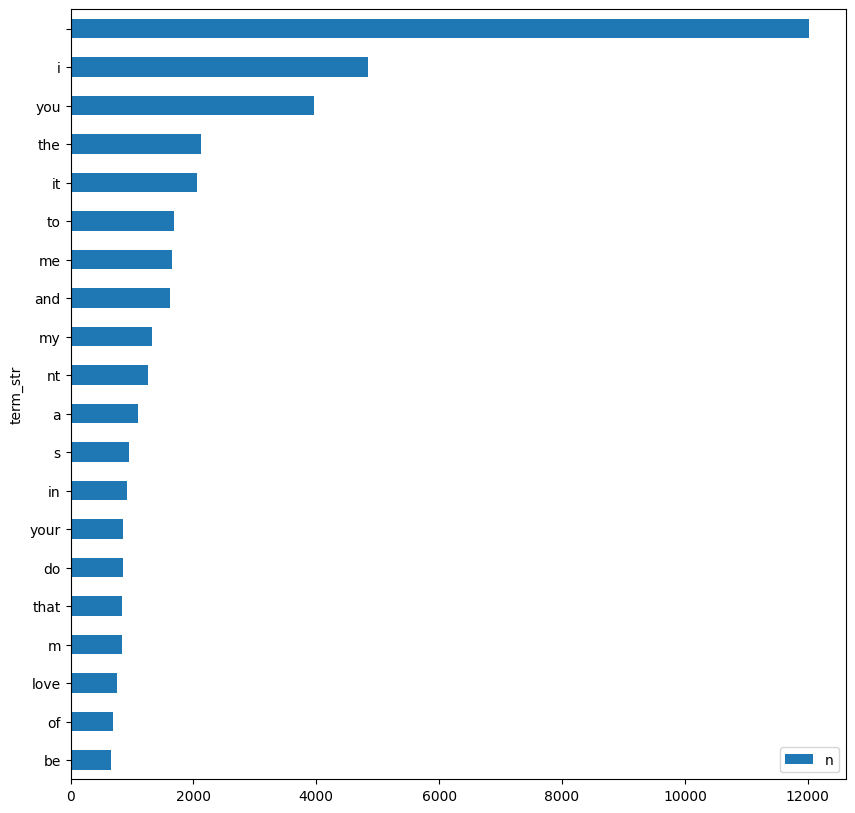

In [489]:
VOCAB.sort_values('n').tail(20).plot.barh(y='n',figsize=(10,10))

# -------------------------------------------------------